# Code for competition

In [1]:
import tensorflow as tf
import numpy as np
import os
import random
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix
from PIL import Image
import re

tfk = tf.keras
tfkl = tf.keras.layers
print(tf.__version__)
print(tf.config.list_physical_devices())

# Enable experimental feature of memory occupation growth control 
physical_devices = tf.config.experimental.list_physical_devices('GPU')
for dev in physical_devices:
    tf.config.experimental.set_memory_growth(dev, True)

# Random seed for reproducibility
seed = 42
random.seed(seed)
os.environ['PYTHONHASHSEED'] = str(seed)
np.random.seed(seed)
tf.random.set_seed(seed)
tf.compat.v1.set_random_seed(seed)

2.6.0
[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


### Metadata

In [2]:
classes = ["Species1", "Species2", "Species3", "Species4", "Species5", "Species6", "Species7", "Species8"]
input_shape = (96, 96, 3)
input_size = input_shape[:-1]

batch_size = 16
epochs = 400

### Prepare the validation set for evaluation purposes

In [3]:
samples = []
targets = []

dest_valid = os.getcwd() + '/training_data_final'

for folder in os.listdir(dest_valid):
    dest_class = dest_valid + '/' + folder
    i = int(re.sub("\D", "", folder)) - 1
    for img in os.listdir(dest_class):
        temp = Image.open(dest_class + '/' + img).convert('RGB')
        image = np.squeeze(np.expand_dims(temp, axis=0))
        label = tfk.utils.to_categorical(i, len(classes))
        samples.append(image)
        targets.append(label)

X_val = np.array(samples, dtype=np.float16)
y_val = np.array(targets, dtype=np.uint8)
del samples
del targets
print(X_val.shape, X_val.dtype, sep=", ")
print(y_val.shape, y_val.dtype, sep=", ")

(3542, 96, 96, 3), float16
(3542, 8), uint8


### Plot the confusion matrix (evaluated on the validation set)

In [13]:
def plot_cm(model):
    predictions = model.predict(X_val)
    print(type(np.array(predictions)))
    cm = confusion_matrix(np.argmax(y_val, axis=-1), np.argmax(predictions, axis=-1))

    accuracy = accuracy_score(np.argmax(y_val, axis=-1), np.argmax(predictions, axis=-1))
    precision = precision_score(np.argmax(y_val, axis=-1), np.argmax(predictions, axis=-1), average='macro')
    recall = recall_score(np.argmax(y_val, axis=-1), np.argmax(predictions, axis=-1), average='macro')
    f1 = f1_score(np.argmax(y_val, axis=-1), np.argmax(predictions, axis=-1), average=None)
    print('Accuracy:',accuracy.round(4))
    print('Precision:',precision.round(4))
    print('Recall:',recall.round(4))
    print('F1:',f1.round(4))

    plt.figure(figsize=(10,8))
    sns.heatmap(cm.T, xticklabels=classes, yticklabels=classes, annot=True, fmt="d")
    plt.xlabel('True labels')
    plt.ylabel('Predicted labels')
    plt.show()

### Import the model

In [5]:
import model

ensemble_model = model.model(os.getcwd())

### Load and test all the models

<class 'numpy.ndarray'>
Accuracy: 0.9757
Precision: 0.979
Recall: 0.9707
F1: [0.9556 0.9699 0.9853 0.9557 0.9859 0.9817 0.9926 0.969 ]


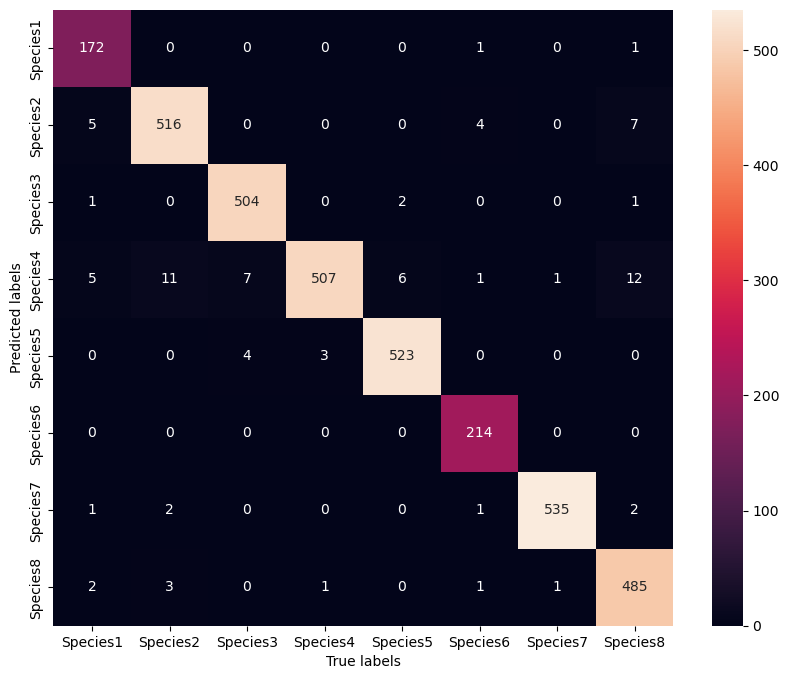

In [16]:
model = tfk.models.load_model(r'eff_models/best_model (5)')
plot_cm(model)